In [1]:
import torch
import btbench_config

# Make sure the config ROOT_DIR is set correctly
print("Expected braintreebank data at:", btbench_config.ROOT_DIR)
print("Sampling rate:", btbench_config.SAMPLING_RATE, "Hz")

Expected braintreebank data at: /om2/user/zaho/braintreebank/braintreebank
Sampling rate: 2048 Hz


## The BrainTreebankSubject Class

In [2]:
from braintreebank_subject import BrainTreebankSubject

subject_id = 3

# use cache=True to load this trial's neural data into RAM, if you have enough memory!
# It will make the loading process faster.
subject = BrainTreebankSubject(subject_id, allow_corrupted=False, cache=True, dtype=torch.float32)
print("Electrode labels:", subject.electrode_labels) # list of electrode labels

# Optionally, subset the electrodes to a specific set of electrodes.
#subject.set_electrode_subset(['F3aOFa2', 'F3aOFa3', 'F3aOFa4', 'F3aOFa7']) # if you change this line when using cache=True, you need to clear the cache after: subject.clear_neural_data_cache()
print("Electrode labels after subsetting:", subject.electrode_labels)

Electrode labels: ['F2Ia1', 'F2Ia2', 'F2Ia3', 'F2Ia4', 'F2Ia5', 'F2Ia6', 'F2Ia7', 'F2Ia8', 'F2Ia9', 'F2Ia10', 'F2Ia11', 'F2Ia12', 'F2Ia13', 'F2Ia14', 'F3c1', 'F3c2', 'F3c3', 'F3c4', 'F3c5', 'F3c6', 'F3c8', 'F3c9', 'F3c10', 'F3b1', 'F3b2', 'F3b3', 'F3b4', 'F3b7', 'F3b8', 'F3aOF1', 'F3aOF2', 'F3aOF3', 'F3aOF4', 'F3aOF5', 'F3aOF6', 'F3aOF7', 'F3aOF8', 'F3d1', 'F3d2', 'F3d3', 'F3d4', 'F3d5', 'F3d6', 'F3d7', 'F3d8', 'F3d9', 'F3d10', 'T1aIc1', 'T1aIc2', 'T1aIc3', 'T1aIc4', 'T1aIc5', 'T1aIc6', 'P2a1', 'P2a2', 'P2a3', 'P2a4', 'P2a5', 'P2a6', 'P2a7', 'P2a8', 'P2a9', 'P2a10', 'T1b1', 'T1b2', 'T1b3', 'T1b4', 'T1b5', 'T1b6', 'T1cIe1', 'T1cIe2', 'T1cIe5', 'T1cIe6', 'T1cIe7', 'T1cIe8', 'T1cIe9', 'T1cIe10', 'T1cIe11', 'T1cIe12', 'P2b1', 'P2b3', 'P2b4', 'P2b5', 'P2b6', 'P2b7', 'P2b8', 'P2b9', 'P2b10', 'P2b11', 'P2b12', 'P2b13', 'P2b14', 'P2b15', 'P2b16', 'O1aIb1', 'O1aIb2', 'O1aIb3', 'O1aIb4', 'O1aIb5', 'O1aIb6', 'O1aIb7', 'O1aIb8', 'O1aIb9', 'O1aIb10', 'O1aIb11', 'O1aIb12', 'O1aIb13', 'O1aIb14', 'O1a

Loading the electrode data and electrode coordinates

In [3]:
trial_id = 0

subject.load_neural_data(trial_id)
window_from = None
window_to = None # if None, the whole trial will be loaded

print("All neural data shape:")
print(subject.get_all_electrode_data(trial_id, window_from=window_from, window_to=window_to).shape) # (n_electrodes, n_samples). To get the data for a specific electrode, use subject.get_electrode_data(trial_id, electrode_label)

All neural data shape:
torch.Size([124, 14017056])


## The BrainTreebankSubjectTrialBenchmarkDataset Class

In [56]:
from btbench_datasets import BrainTreebankSubjectTrialBenchmarkDataset

# Options for eval_name (from the BTBench paper):
#   frame_brightness, global_flow, local_flow, global_flow_angle, local_flow_angle, face_num, volume, pitch, delta_volume, 
#   delta_pitch, speech, onset, gpt2_surprisal, word_length, word_gap, word_index, word_head_pos, word_part_speech, speaker
eval_name = "volume"

# if True, the dataset will output the indices of the samples in the neural data in a tuple: (index_from, index_to); 
# if False, the dataset will output the neural data directly
output_indices = False

start_neural_data_before_word_onset = 0 # the number of samples to start the neural data before each word onset
end_neural_data_after_word_onset = btbench_config.SAMPLING_RATE * 1 # the number of samples to end the neural data after each word onset -- here we use 1 second


dataset = BrainTreebankSubjectTrialBenchmarkDataset(subject, trial_id, dtype=torch.float32, eval_name=eval_name, output_indices=output_indices, 
                                                    start_neural_data_before_word_onset=start_neural_data_before_word_onset, end_neural_data_after_word_onset=end_neural_data_after_word_onset)

print("Items in the dataset:", len(dataset), "\n")
print("The first item:", dataset[0][0], f"label = {dataset[0][1]}", sep="\n")

Items in the dataset: 5379 

The first item:
tensor([[ -78.6894,  -81.0820,  -79.7528,  ...,  -14.8872,  -13.8238,
          -14.8872],
        [ -86.3989,  -85.6013,  -83.7404,  ...,  -52.9027,  -55.0294,
          -56.0928],
        [ -40.9398,  -39.0789,  -38.2813,  ...,  -37.7497,  -38.0155,
          -38.2813],
        ...,
        [  42.5348,   43.3324,   43.3324,  ...,  -16.7481,  -20.2040,
          -22.0649],
        [ 156.3155,  156.0497,  157.6447,  ...,  -98.3618, -102.3494,
         -104.7420],
        [ -39.0789,  -40.6739,  -39.6106,  ...,  -13.0263,  -17.0139,
          -18.6090]])
label = 0


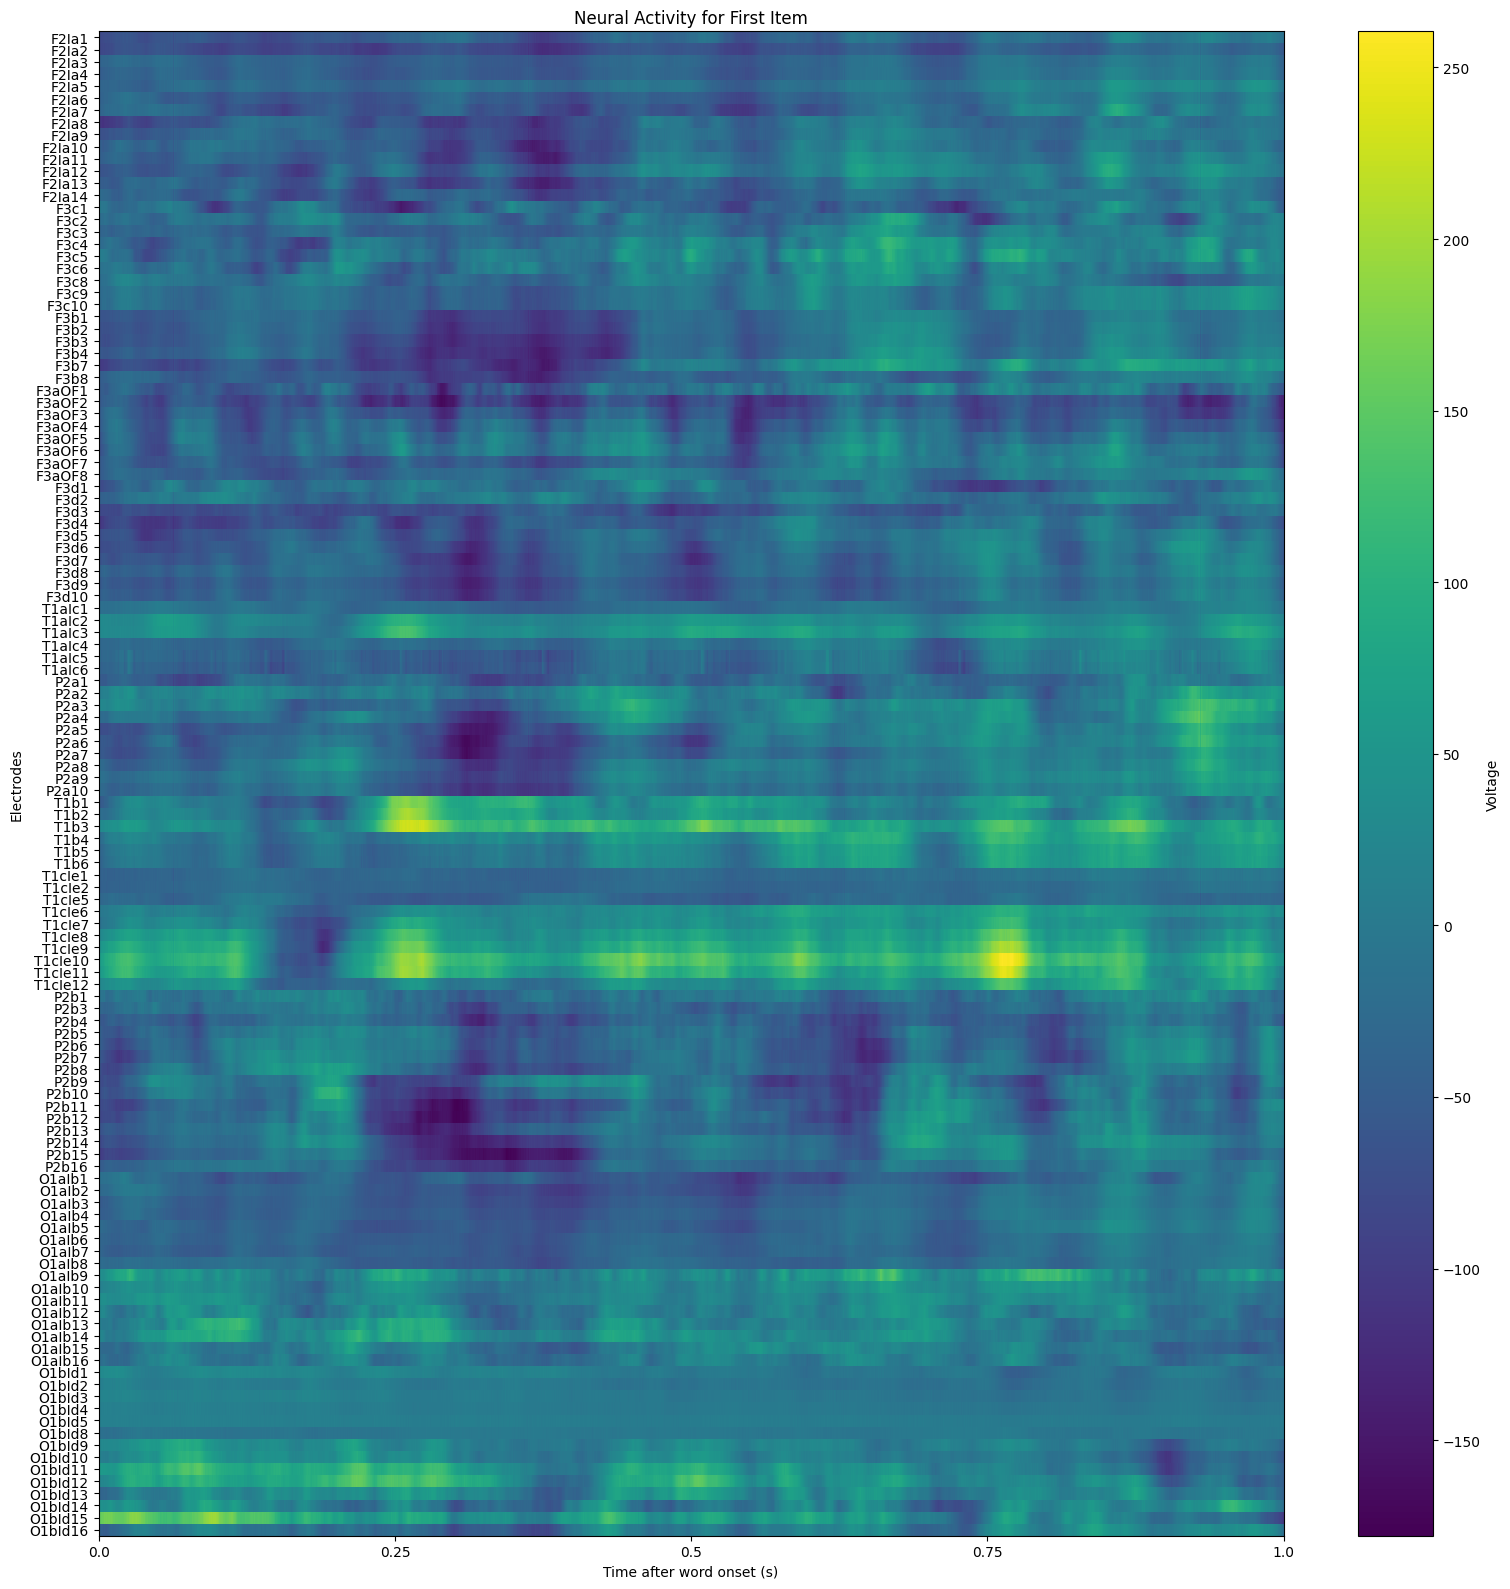

In [57]:
import numpy as np

# Get the first item's data
first_item = dataset[0][0]  # Shape: (n_electrodes, n_samples)

# Create heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 16))
plt.imshow(first_item, cmap='viridis', aspect='auto', interpolation='none')
plt.yticks(range(len(subject.electrode_labels)), subject.electrode_labels)
plt.title('Neural Activity for First Item')
plt.xlabel('Time after word onset (s)')
plt.ylabel('Electrodes')

n_ticks = 5
ticks = np.linspace(0, first_item.shape[1], n_ticks, endpoint=True)
ticklabels = np.linspace(-start_neural_data_before_word_onset/btbench_config.SAMPLING_RATE, end_neural_data_after_word_onset/btbench_config.SAMPLING_RATE, n_ticks, endpoint=True)
plt.xticks(ticks, labels=ticklabels, rotation=0)

plt.colorbar(label='Voltage')
plt.tight_layout()
plt.show()


## Train/Test Splits

In this example, we generate 5 train/test splits for the Single Subject Single Movie (SS-SM) evaluation.

All options: generate_splits_SS_SM, generate_splits_SS_DM, generate_splits_DS_DM, generate_splits_DS_SM

In [58]:
from sklearn.model_selection import KFold
X = np.array([item[0].flatten() for item in dataset])
y = np.array([item[1] for item in dataset])

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=False)  # shuffle=False is important to avoid correlated train/test splits!

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
def evaluate_model(p_unmasked, standardize_data=True):
    subselect_indices = np.random.choice(X.shape[1], size=min(int(p_unmasked * X.shape[1]), X.shape[1]-1), replace=False)
    test_accuracies = []
    test_aurocs = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train = X[train_idx][:, subselect_indices]
        X_test = X[test_idx][:, subselect_indices]
        y_train = y[train_idx]
        y_test = y[test_idx]

        # Standardize the data
        scaling_time = 0
        if standardize_data:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

        # Train logistic regression
        clf = LogisticRegression(random_state=42, max_iter=1000, tol=1e-3)
        clf.fit(X_train, y_train)

        # Evaluate model
        test_score = clf.score(X_test, y_test)
        test_accuracies.append(test_score)

        # Get predictions and probabilities
        test_probs = clf.predict_proba(X_test)

        # Filter test samples to only include classes that were in training
        valid_class_mask = np.isin(y_test, clf.classes_)
        y_test_filtered = y_test[valid_class_mask]
        test_probs_filtered = test_probs[valid_class_mask]

        # Convert to one-hot encoding
        y_test_onehot = np.zeros((len(y_test_filtered), len(clf.classes_)))
        for i, label in enumerate(y_test_filtered):
            class_idx = np.where(clf.classes_ == label)[0][0]
            y_test_onehot[i, class_idx] = 1

        # Calculate ROC AUC scores
        from sklearn.metrics import roc_auc_score
        n_classes = len(clf.classes_)
        if n_classes > 2:
            test_roc = roc_auc_score(y_test_onehot, test_probs_filtered, multi_class='ovr', average='macro')
        else:
            test_roc = roc_auc_score(y_test_onehot, test_probs_filtered)
        test_aurocs.append(test_roc)

    return np.array(test_accuracies), np.array(test_aurocs)

In [60]:
p_unmasked_values = np.logspace(-5, -1, 6) # min: 1 / 253952
n_seeds = 6

test_accuracies_all = np.zeros((n_seeds, len(p_unmasked_values)+1, n_folds))
test_aurocs_all = np.zeros((n_seeds, len(p_unmasked_values)+1, n_folds))

for seed in range(n_seeds):
    print(f"Seed {seed+1} of {n_seeds}")
    for i, p_unmasked in enumerate(p_unmasked_values):
        test_accuracies, test_aurocs = evaluate_model(p_unmasked)
        test_accuracies_all[seed, i, :] = test_accuracies
        test_aurocs_all[seed, i, :] = test_aurocs
        print(f"p_unmasked = {p_unmasked}, test_accuracy = {test_accuracies.mean():.3f}, test_auroc = {test_aurocs.mean():.3f}")

i = -1
p_unmasked = 1
print(f"Final: p_unmasked = {p_unmasked:.6f}")
test_accuracies, test_aurocs = evaluate_model(p_unmasked)
for seed in range(n_seeds):
    test_accuracies_all[seed, i, :] = test_accuracies
    test_aurocs_all[seed, i, :] = test_aurocs
print(f"p_unmasked = {p_unmasked}, test_accuracy = {test_accuracies.mean():.3f}, test_auroc = {test_aurocs.mean():.3f}")

Seed 1 of 6
p_unmasked = 1e-05, test_accuracy = 0.335, test_auroc = 0.529
p_unmasked = 6.309573444801929e-05, test_accuracy = 0.439, test_auroc = 0.569
p_unmasked = 0.00039810717055349735, test_accuracy = 0.545, test_auroc = 0.640
p_unmasked = 0.002511886431509582, test_accuracy = 0.600, test_auroc = 0.684
p_unmasked = 0.01584893192461114, test_accuracy = 0.611, test_auroc = 0.683
p_unmasked = 0.1, test_accuracy = 0.627, test_auroc = 0.702
Seed 2 of 6
p_unmasked = 1e-05, test_accuracy = 0.327, test_auroc = 0.527
p_unmasked = 6.309573444801929e-05, test_accuracy = 0.434, test_auroc = 0.563
p_unmasked = 0.00039810717055349735, test_accuracy = 0.534, test_auroc = 0.617
p_unmasked = 0.002511886431509582, test_accuracy = 0.590, test_auroc = 0.671
p_unmasked = 0.01584893192461114, test_accuracy = 0.618, test_auroc = 0.695
p_unmasked = 0.1, test_accuracy = 0.635, test_auroc = 0.707
Seed 3 of 6
p_unmasked = 1e-05, test_accuracy = 0.330, test_auroc = 0.527
p_unmasked = 6.309573444801929e-05, te

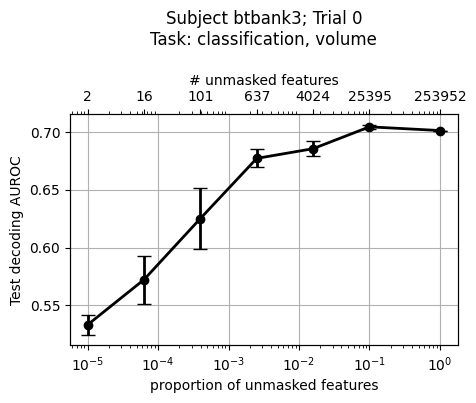

In [62]:
import matplotlib.pyplot as plt

# Calculate means and standard errors across seeds
mean_aurocs = test_aurocs_all.mean(axis=0).mean(axis=1)  # Mean across seeds and folds
std_aurocs = test_aurocs_all.mean(axis=2).std(axis=0)    # Std across seeds

# Create x-axis values including p=1.0
x_values = np.append(p_unmasked_values, 1.0)

fig, ax1 = plt.subplots(figsize=(5, 3))

# Plot on primary axis
ax1.errorbar(x_values, mean_aurocs, yerr=std_aurocs, fmt='o-', capsize=5, color='black', linewidth=2)
ax1.set_xscale('log')
ax1.set_xlabel('proportion of unmasked features')
ax1.set_ylabel('Test decoding AUROC')
ax1.grid(True)

# Create secondary x-axis
ax2 = ax1.twiny()
ax2.set_xscale('log')
ax2.set_xlim(ax1.get_xlim())
feature_counts = x_values * X.shape[1]  # Multiply by total number of features
ax2.set_xlabel('# unmasked features')
ax2.set_xticks(x_values)
ax2.set_xticklabels([f'{int(x)}' for x in feature_counts])

plt.title(f'Subject btbank{subject_id}; Trial {trial_id}\nTask: classification, {eval_name}\n')
plt.show()
